#**Análise de dados dos casos confirmados da COVID-19**

###**Paises analisados:**

- Brasil;
- China;
- Itália;
- Estados Unidos;
- Índia.

###**Objetivos**

- Verificar a curva de acumulo de casos da covid-19;
- Observar o acumulo individual nos casos confirmados de cada país da lista;
- Observar a comparação entre os número de infectados dos países em uma unica visualização.

**Fonte:** https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [46]:
##Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [47]:
##Importando o dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

casos_globais = pd.read_csv(url)

In [48]:
##exibindo o dataframe
casos_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259


In [49]:
##exibindo  os tipos das colunas do dataframe
casos_globais.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
12/1/21             int64
12/2/21             int64
12/3/21             int64
12/4/21             int64
12/5/21             int64
Length: 688, dtype: object

In [50]:
##Eliminando a divisão por provincias de países do dataframe
casos_globais = casos_globais.groupby('Country/Region').sum()
casos_globais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259


In [51]:
##Função para plotagem de graficos de linhas
def Grafico_de_linha(data, casos, pais):
    titulo = 'Total de casos confirmados da COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de casos confirmados',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, casos)
    plt.show()

In [52]:
##Filtrando apenas informações do brasil
casos_brasil = casos_globais.loc['Brazil']
casos_brasil.head()

Lat       -14.2350
Long      -51.9253
1/22/20     0.0000
1/23/20     0.0000
1/24/20     0.0000
Name: Brazil, dtype: float64

In [53]:
##Filtrando Infomações para um intervalo de 10 em 10 dias
casos_brasil = casos_brasil.loc[::10]

In [54]:
#Aribuindo a listas separadas as informações de data(data) e numeros de casos confirmados por data(casos) 
data_br = casos_brasil.index
casos_br = casos_brasil.values

In [55]:
#A lista 'data' recebeu os valores de index do dataframe 'casos_brasil'
data_br

Index(['Lat', '1/30/20', '2/9/20', '2/19/20', '2/29/20', '3/10/20', '3/20/20',
       '3/30/20', '4/9/20', '4/19/20', '4/29/20', '5/9/20', '5/19/20',
       '5/29/20', '6/8/20', '6/18/20', '6/28/20', '7/8/20', '7/18/20',
       '7/28/20', '8/7/20', '8/17/20', '8/27/20', '9/6/20', '9/16/20',
       '9/26/20', '10/6/20', '10/16/20', '10/26/20', '11/5/20', '11/15/20',
       '11/25/20', '12/5/20', '12/15/20', '12/25/20', '1/4/21', '1/14/21',
       '1/24/21', '2/3/21', '2/13/21', '2/23/21', '3/5/21', '3/15/21',
       '3/25/21', '4/4/21', '4/14/21', '4/24/21', '5/4/21', '5/14/21',
       '5/24/21', '6/3/21', '6/13/21', '6/23/21', '7/3/21', '7/13/21',
       '7/23/21', '8/2/21', '8/12/21', '8/22/21', '9/1/21', '9/11/21',
       '9/21/21', '10/1/21', '10/11/21', '10/21/21', '10/31/21', '11/10/21',
       '11/20/21', '11/30/21'],
      dtype='object')

In [56]:
#A lista 'casos' recebeu os valores contidos no dataframe 'casos_brasil'
casos_br

array([-1.4235000e+01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        2.0000000e+00,  3.1000000e+01,  7.9300000e+02,  4.5790000e+03,
        1.8092000e+04,  3.8654000e+04,  7.9685000e+04,  1.5606100e+05,
        2.7188500e+05,  4.6516600e+05,  7.0741200e+05,  9.7814200e+05,
        1.3441430e+06,  1.7131600e+06,  2.0748600e+06,  2.4831910e+06,
        2.9624420e+06,  3.3595700e+06,  3.7613910e+06,  4.1375210e+06,
        4.4190830e+06,  4.7179910e+06,  4.9691410e+06,  5.2003000e+06,
        5.4098540e+06,  5.5900250e+06,  5.8630930e+06,  6.1666060e+06,
        6.5771770e+06,  6.9700340e+06,  7.4485600e+06,  7.7537520e+06,
        8.3242940e+06,  8.8445770e+06,  9.3394200e+06,  9.8097540e+06,
        1.0257875e+07,  1.0869227e+07,  1.1519609e+07,  1.2320169e+07,
        1.2984956e+07,  1.3673507e+07,  1.4308215e+07,  1.4856888e+07,
        1.5519525e+07,  1.6120756e+07,  1.6803472e+07,  1.7412766e+07,
        1.8169881e+07,  1.8742025e+07,  1.9151993e+07,  1.9632443e+07,
      

**Dados do Brasil**

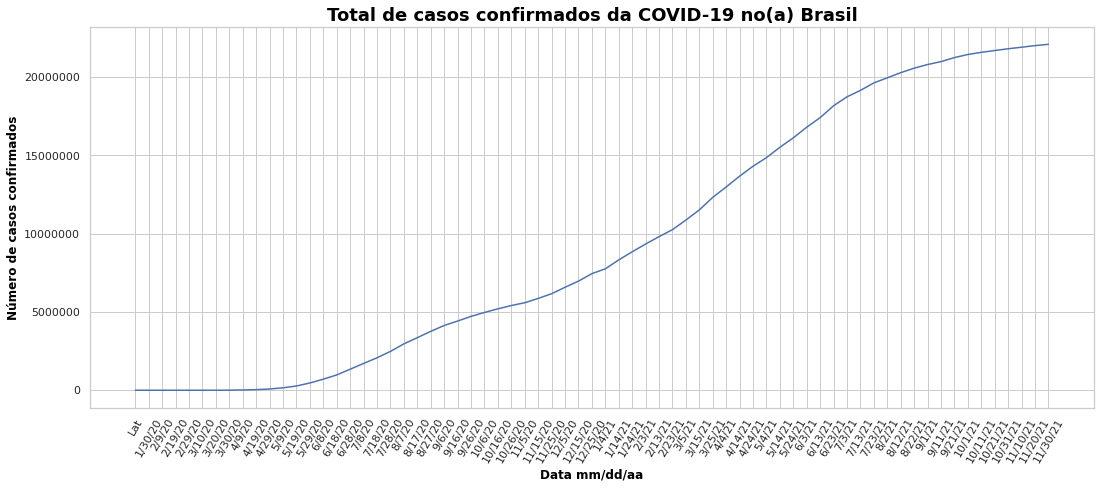

In [57]:
Grafico_de_linha(data_br, casos_br, 'Brasil')

In [58]:
##Exibindo dados de outros Paises: China
casos_china = casos_globais.loc['China']
casos_china.describe()

count       686.000000
mean      93050.593630
std       17631.821852
min         548.000000
25%       84992.000000
50%       95676.000000
75%      103461.250000
max      111741.000000
Name: China, dtype: float64

In [59]:
casos_china = casos_china.loc[::10]
data_ch = casos_china.index
casos_ch = casos_china.values


In [60]:
data_ch

Index(['Lat', '1/30/20', '2/9/20', '2/19/20', '2/29/20', '3/10/20', '3/20/20',
       '3/30/20', '4/9/20', '4/19/20', '4/29/20', '5/9/20', '5/19/20',
       '5/29/20', '6/8/20', '6/18/20', '6/28/20', '7/8/20', '7/18/20',
       '7/28/20', '8/7/20', '8/17/20', '8/27/20', '9/6/20', '9/16/20',
       '9/26/20', '10/6/20', '10/16/20', '10/26/20', '11/5/20', '11/15/20',
       '11/25/20', '12/5/20', '12/15/20', '12/25/20', '1/4/21', '1/14/21',
       '1/24/21', '2/3/21', '2/13/21', '2/23/21', '3/5/21', '3/15/21',
       '3/25/21', '4/4/21', '4/14/21', '4/24/21', '5/4/21', '5/14/21',
       '5/24/21', '6/3/21', '6/13/21', '6/23/21', '7/3/21', '7/13/21',
       '7/23/21', '8/2/21', '8/12/21', '8/22/21', '9/1/21', '9/11/21',
       '9/21/21', '10/1/21', '10/11/21', '10/21/21', '10/31/21', '11/10/21',
       '11/20/21', '11/30/21'],
      dtype='object')

In [61]:
casos_ch

array([  1085.2923,   8141.    ,  39829.    ,  74619.    ,  79356.    ,
        80887.    ,  81250.    ,  82198.    ,  82883.    ,  83805.    ,
        83944.    ,  83990.    ,  84063.    ,  84123.    ,  84195.    ,
        84494.    ,  84757.    ,  84950.    ,  85418.    ,  86990.    ,
        88580.    ,  89441.    ,  89814.    ,  90058.    ,  90253.    ,
        90456.    ,  90667.    ,  90925.    ,  91175.    ,  91552.    ,
        91850.    ,  92402.    ,  93467.    ,  94537.    ,  95460.    ,
        96246.    ,  97448.    ,  99247.    , 100226.    , 100578.    ,
       100808.    , 101076.    , 101421.    , 101623.    , 101861.    ,
       102118.    , 102367.    , 102560.    , 102696.    , 102890.    ,
       103094.    , 103380.    , 103620.    , 103841.    , 104126.    ,
       104563.    , 105242.    , 106348.    , 106772.    , 107102.    ,
       107404.    , 108080.    , 108495.    , 108780.    , 109058.    ,
       109666.    , 110454.    , 110943.    , 111337.    ])

**Dados China**

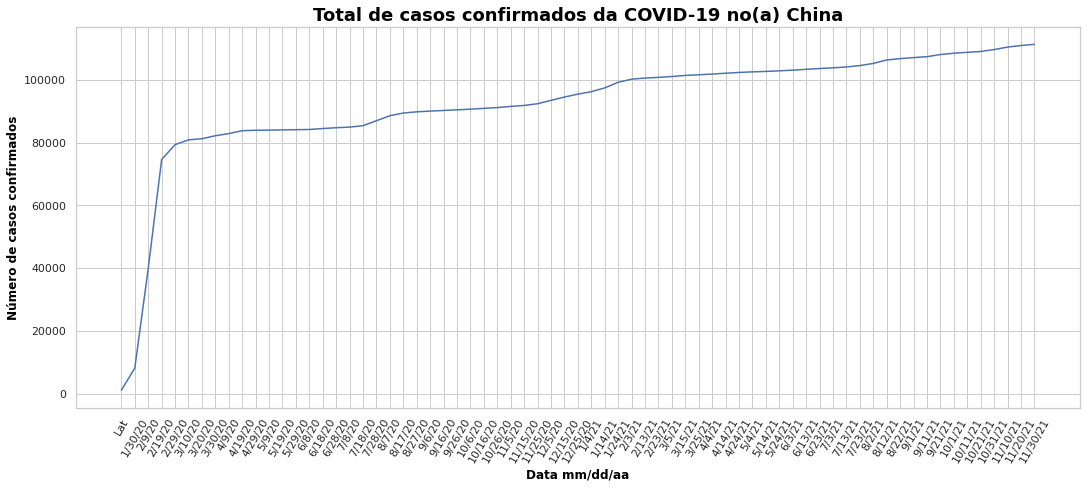

In [62]:
Grafico_de_linha(data_ch, casos_ch, 'China')

In [63]:
##Exibindo dados de outros Paises: Italia
casos_italia = casos_globais.loc['Italy']
casos_italia = casos_italia.loc[::10]
data_it = casos_italia.index
casos_it = casos_italia.values

In [64]:
data_it

Index(['Lat', '1/30/20', '2/9/20', '2/19/20', '2/29/20', '3/10/20', '3/20/20',
       '3/30/20', '4/9/20', '4/19/20', '4/29/20', '5/9/20', '5/19/20',
       '5/29/20', '6/8/20', '6/18/20', '6/28/20', '7/8/20', '7/18/20',
       '7/28/20', '8/7/20', '8/17/20', '8/27/20', '9/6/20', '9/16/20',
       '9/26/20', '10/6/20', '10/16/20', '10/26/20', '11/5/20', '11/15/20',
       '11/25/20', '12/5/20', '12/15/20', '12/25/20', '1/4/21', '1/14/21',
       '1/24/21', '2/3/21', '2/13/21', '2/23/21', '3/5/21', '3/15/21',
       '3/25/21', '4/4/21', '4/14/21', '4/24/21', '5/4/21', '5/14/21',
       '5/24/21', '6/3/21', '6/13/21', '6/23/21', '7/3/21', '7/13/21',
       '7/23/21', '8/2/21', '8/12/21', '8/22/21', '9/1/21', '9/11/21',
       '9/21/21', '10/1/21', '10/11/21', '10/21/21', '10/31/21', '11/10/21',
       '11/20/21', '11/30/21'],
      dtype='object')

In [65]:
casos_it

array([4.187194e+01, 0.000000e+00, 3.000000e+00, 3.000000e+00,
       1.128000e+03, 1.014900e+04, 4.702100e+04, 1.017390e+05,
       1.436260e+05, 1.789720e+05, 2.035910e+05, 2.182680e+05,
       2.266990e+05, 2.322480e+05, 2.352780e+05, 2.381590e+05,
       2.403100e+05, 2.421490e+05, 2.442160e+05, 2.464880e+05,
       2.497560e+05, 2.542350e+05, 2.639490e+05, 2.776340e+05,
       2.914420e+05, 3.081040e+05, 3.302630e+05, 3.916110e+05,
       5.427890e+05, 8.248790e+05, 1.178529e+06, 1.480874e+06,
       1.709991e+06, 1.870576e+06, 2.028354e+06, 2.166244e+06,
       2.336279e+06, 2.466813e+06, 2.583790e+06, 2.710819e+06,
       2.832162e+06, 3.023129e+06, 3.238394e+06, 3.464543e+06,
       3.668264e+06, 3.809193e+06, 3.949517e+06, 4.059821e+06,
       4.146722e+06, 4.194672e+06, 4.225163e+06, 4.244872e+06,
       4.255434e+06, 4.262511e+06, 4.273693e+06, 4.307535e+06,
       4.358533e+06, 4.420429e+06, 4.484613e+06, 4.546487e+06,
       4.601749e+06, 4.641890e+06, 4.675758e+06, 4.7018

**Dados Itália**

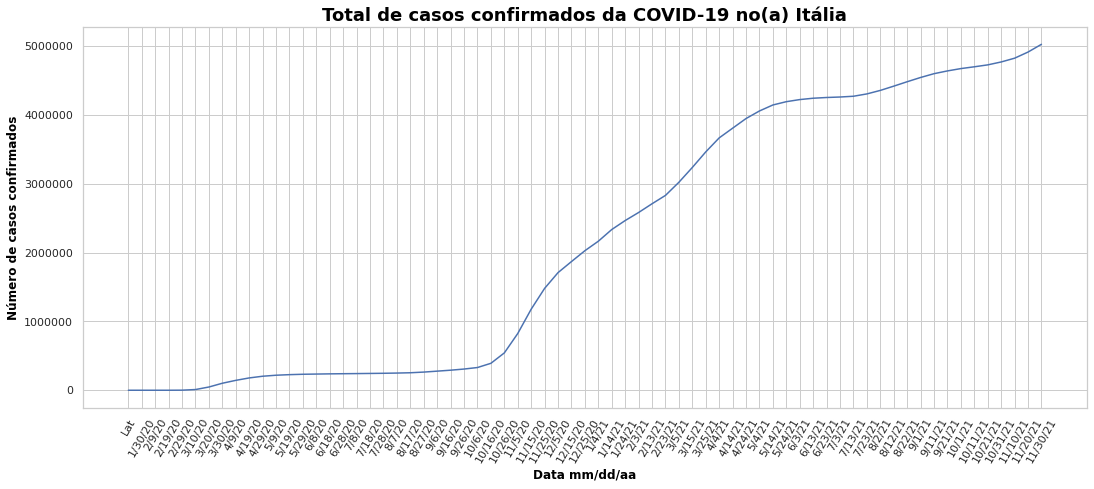

In [66]:
Grafico_de_linha(data_it, casos_it, 'Itália')

In [67]:
##Exibindo dados de outros Paises: EUA
casos_estados_unidos = casos_globais.loc['US']
casos_estados_unidos = casos_estados_unidos.loc[::10]
data_us = casos_estados_unidos.index
casos_us = casos_estados_unidos.values

In [68]:
data_us

Index(['Lat', '1/30/20', '2/9/20', '2/19/20', '2/29/20', '3/10/20', '3/20/20',
       '3/30/20', '4/9/20', '4/19/20', '4/29/20', '5/9/20', '5/19/20',
       '5/29/20', '6/8/20', '6/18/20', '6/28/20', '7/8/20', '7/18/20',
       '7/28/20', '8/7/20', '8/17/20', '8/27/20', '9/6/20', '9/16/20',
       '9/26/20', '10/6/20', '10/16/20', '10/26/20', '11/5/20', '11/15/20',
       '11/25/20', '12/5/20', '12/15/20', '12/25/20', '1/4/21', '1/14/21',
       '1/24/21', '2/3/21', '2/13/21', '2/23/21', '3/5/21', '3/15/21',
       '3/25/21', '4/4/21', '4/14/21', '4/24/21', '5/4/21', '5/14/21',
       '5/24/21', '6/3/21', '6/13/21', '6/23/21', '7/3/21', '7/13/21',
       '7/23/21', '8/2/21', '8/12/21', '8/22/21', '9/1/21', '9/11/21',
       '9/21/21', '10/1/21', '10/11/21', '10/21/21', '10/31/21', '11/10/21',
       '11/20/21', '11/30/21'],
      dtype='object')

In [69]:
casos_us

array([4.0000000e+01, 6.0000000e+00, 1.2000000e+01, 1.4000000e+01,
       2.5000000e+01, 7.8200000e+02, 2.0030000e+04, 1.6569800e+05,
       4.8059600e+05, 7.6934200e+05, 1.0517330e+06, 1.3199910e+06,
       1.5388700e+06, 1.7556040e+06, 1.9601000e+06, 2.1894250e+06,
       2.5545270e+06, 3.0637800e+06, 3.7185050e+06, 4.3615290e+06,
       4.9459130e+06, 5.4418740e+06, 5.8671430e+06, 6.2786470e+06,
       6.6344960e+06, 7.0811860e+06, 7.5043490e+06, 8.0601660e+06,
       8.7316780e+06, 9.7211630e+06, 1.1157358e+07, 1.2910215e+07,
       1.4766843e+07, 1.6894785e+07, 1.8940629e+07, 2.1011493e+07,
       2.3462300e+07, 2.5279848e+07, 2.6682637e+07, 2.7711688e+07,
       2.8369052e+07, 2.9032891e+07, 2.9564777e+07, 3.0151112e+07,
       3.0784580e+07, 3.1495907e+07, 3.2121722e+07, 3.2590550e+07,
       3.2973734e+07, 3.3222742e+07, 3.3403139e+07, 3.3540829e+07,
       3.3657057e+07, 3.3794190e+07, 3.3998992e+07, 3.4488750e+07,
       3.5227423e+07, 3.6469848e+07, 3.7827790e+07, 3.9556084e

**Dados EUA**

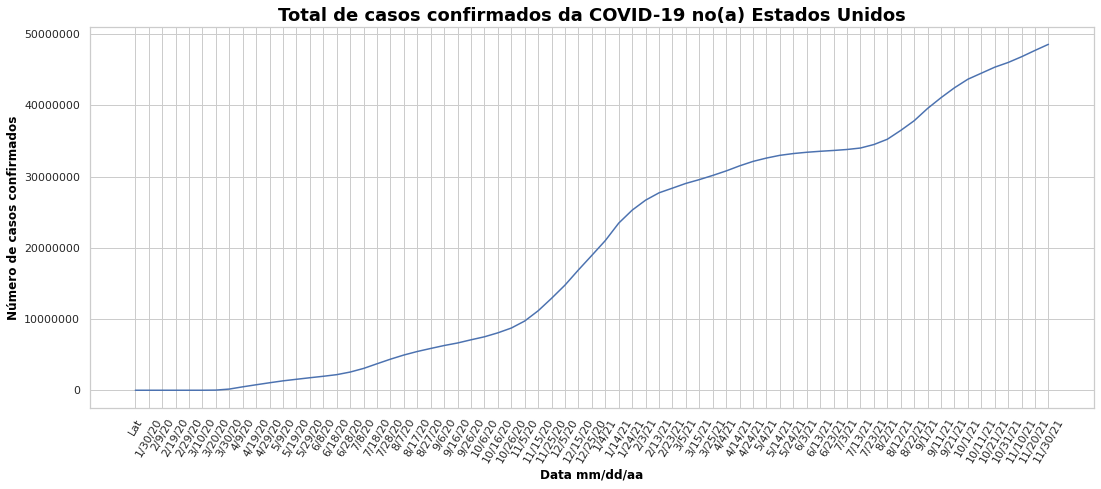

In [70]:
Grafico_de_linha(data_us, casos_us, 'Estados Unidos')

In [71]:
##Exibindo dados de outros Paises: India
casos_india = casos_globais.loc['India']
casos_india = casos_india.loc[::10]
data_id = casos_india.index
casos_id = casos_india.values

In [72]:
casos_id

array([2.0593684e+01, 1.0000000e+00, 3.0000000e+00, 3.0000000e+00,
       3.0000000e+00, 5.6000000e+01, 2.4400000e+02, 1.2510000e+03,
       6.7250000e+03, 1.7615000e+04, 3.3062000e+04, 6.2808000e+04,
       1.0647500e+05, 1.7349100e+05, 2.6592800e+05, 3.8053200e+05,
       5.4831800e+05, 7.6729600e+05, 1.0777810e+06, 1.5316690e+06,
       2.0886110e+06, 2.7026810e+06, 3.3875000e+06, 4.2046130e+06,
       5.1182530e+06, 5.9925320e+06, 6.7571310e+06, 7.4326800e+06,
       7.9464290e+06, 8.4117240e+06, 8.8451270e+06, 9.2667050e+06,
       9.6442220e+06, 9.9325470e+06, 1.0169118e+07, 1.0356844e+07,
       1.0527683e+07, 1.0667736e+07, 1.0790183e+07, 1.0904940e+07,
       1.1030176e+07, 1.1192045e+07, 1.1409831e+07, 1.1846652e+07,
       1.2589067e+07, 1.4074564e+07, 1.6960172e+07, 2.0664979e+07,
       2.4372907e+07, 2.6948874e+07, 2.8574350e+07, 2.9510410e+07,
       3.0082778e+07, 3.0545433e+07, 3.0946147e+07, 3.1332159e+07,
       3.1726507e+07, 3.2117826e+07, 3.2449306e+07, 3.2857937e

In [73]:
data_id

Index(['Lat', '1/30/20', '2/9/20', '2/19/20', '2/29/20', '3/10/20', '3/20/20',
       '3/30/20', '4/9/20', '4/19/20', '4/29/20', '5/9/20', '5/19/20',
       '5/29/20', '6/8/20', '6/18/20', '6/28/20', '7/8/20', '7/18/20',
       '7/28/20', '8/7/20', '8/17/20', '8/27/20', '9/6/20', '9/16/20',
       '9/26/20', '10/6/20', '10/16/20', '10/26/20', '11/5/20', '11/15/20',
       '11/25/20', '12/5/20', '12/15/20', '12/25/20', '1/4/21', '1/14/21',
       '1/24/21', '2/3/21', '2/13/21', '2/23/21', '3/5/21', '3/15/21',
       '3/25/21', '4/4/21', '4/14/21', '4/24/21', '5/4/21', '5/14/21',
       '5/24/21', '6/3/21', '6/13/21', '6/23/21', '7/3/21', '7/13/21',
       '7/23/21', '8/2/21', '8/12/21', '8/22/21', '9/1/21', '9/11/21',
       '9/21/21', '10/1/21', '10/11/21', '10/21/21', '10/31/21', '11/10/21',
       '11/20/21', '11/30/21'],
      dtype='object')

**Dados índia**

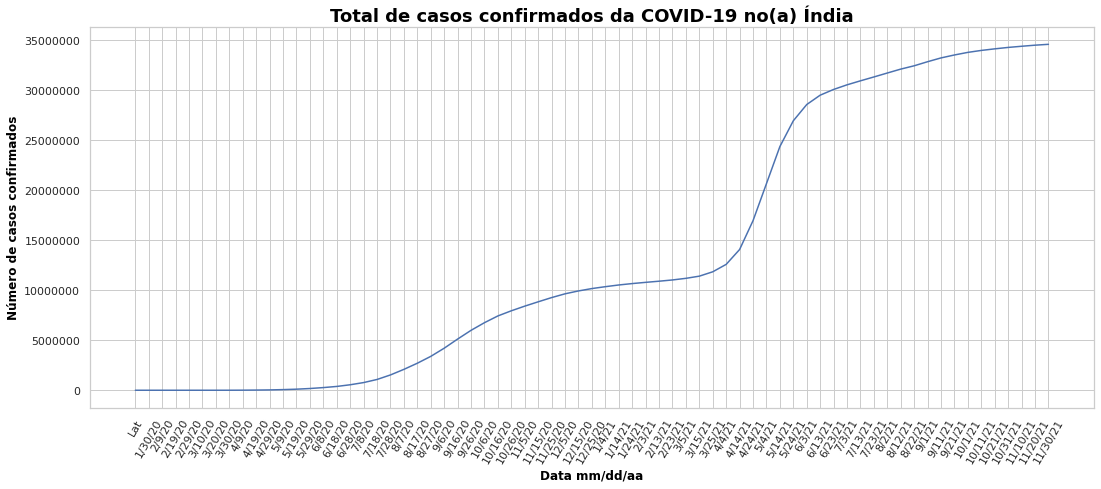

In [74]:
Grafico_de_linha(data_id, casos_id, 'Índia')

**Comparações de dados entres Paises**

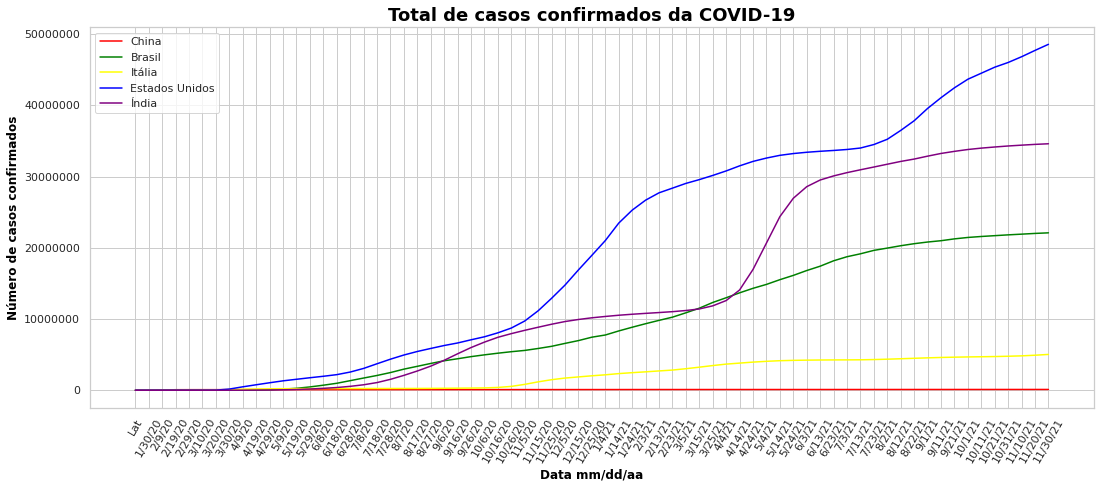

In [75]:
##Comparações etre paises
plt.figure(figsize = (18,7))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Total de casos confirmados da COVID-19',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de casos confirmados',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_ch, casos_ch, color = 'red')
plt.plot(casos_br, color = 'green')
plt.plot(casos_it, color = 'yellow')
plt.plot(casos_us, color = 'blue')
plt.plot(casos_id, color = 'purple')
plt.legend(['China', 'Brasil', 'Itália', 'Estados Unidos', 'Índia'])
plt.show()

#Análise de dados dos óbitos causados pela COVID-19

Nesse notebook iremos analisar os casos de fatalidade onde o resultados da Covid-19 no infectado foi a morte.

Atualmente, seu nome está sendo associado à pandemia de COVID-19 - doença causada por uma nova espécie de coronavírus, o SARS-CoV-2, cujos sintomas variam desde manifestações leves, como perda de olfato e paladar, até quadros mais graves, que provocam falta de ar e podem levar à morte.(Fonte)

###Objetivos

    - Observar informções relevantes sobre os óbitos mundiais;
    - Verificar os países onde estão as maiores quantidades de mortes;
    - Observar o acumulo individual dos óbitos de cada país do top 5 com maior número de óbitos;
    - Observar a comparação entre os óbitos dos países em uma unica visualização.

Fonte: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [76]:
##Comparações de Obitos Por Covid-19
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

mortes_globais = pd.read_csv(url)

In [77]:
mortes_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,131,131,131,131,131,131,132,132,132,132
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735


In [78]:
mortes_globais = mortes_globais.drop(['Lat', 'Long'], axis=1)
mortes_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,131,131,131,131,131,131,132,132,132,132
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735


In [79]:
mortes_globais = mortes_globais.groupby('Country/Region').sum()
mortes_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312
Albania,0,0,0,0,0,0,0,0,0,0,...,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110
Algeria,0,0,0,0,0,0,0,0,0,0,...,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103
Andorra,0,0,0,0,0,0,0,0,0,0,...,131,131,131,131,131,131,132,132,132,132
Angola,0,0,0,0,0,0,0,0,0,0,...,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735


In [80]:
#Média de mortes por país no mundo
mortes_globais.iloc[:,-1].mean()

26815.60714285714

In [81]:
#Total de mortes no mundo(soma de todos os países)
mortes_globais.iloc[:,-1].sum()

5255859

In [82]:
#Top 10 países com maior número de mortes
dados_dash = mortes_globais.iloc[:,-1].sort_values(ascending = False).head(10)
dados_dash

Country/Region
US                788363
Brazil            615636
India             473537
Mexico            295203
Russia            275824
Peru              201379
United Kingdom    146055
Indonesia         143867
Italy             134195
Iran              130200
Name: 12/5/21, dtype: int64

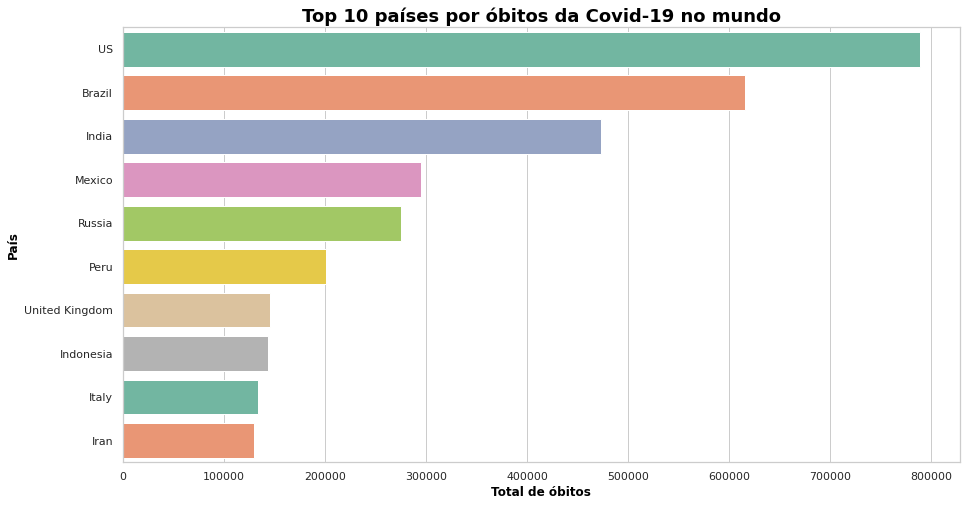

In [83]:
plt.figure(figsize=(15,8))
sns.barplot(x=dados_dash.values, y = dados_dash.index, orient="h", palette="Set2")
plt.title('Top 10 países por óbitos da Covid-19 no mundo',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif',
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Total de óbitos', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.ylabel('País', 
           fontdict={'family': 'sans serif',
                     'color' : 'black',
                     'weight': 'bold',
                     'size': 12})
plt.show()

In [84]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, mortes, pais):
    titulo = 'Acumulo de mortes causadas pela COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de óbitos',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, mortes, color = 'red')
    plt.show()

In [85]:
##Indice de Obitos no Brasil
mortes_brasil = mortes_globais.loc['Brazil']
mortes_brasil

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
12/1/21    614964
12/2/21    615179
12/3/21    615400
12/4/21    615570
12/5/21    615636
Name: Brazil, Length: 684, dtype: int64

In [86]:
mortes_brasil = mortes_brasil.loc[::10]

In [87]:
data_br = mortes_brasil.index
mortes_br = mortes_brasil.values

In [88]:
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21', '4/26/21', '5/6/21',
       '5/16/21', '5/26/21', '6/5/21', '6/15/21', '6/25/21', '7/5/21',
       '7/15/21', '7/25/21', '8/4/21', '8/14/21', '8/24/21', '9/3/21',
       '9/13/21', '9/23/21', '10/3/21', '10/13/21', '10/23/21', '11/2/21',
       '11/12/21', '11/22/21', '12/2/21'],
      dtype='object')

In [89]:
mortes_br

array([     0,      0,      0,      0,      0,      0,     25,    240,
         1124,   2741,   6412,  11653,  20047,  29314,  39680,  49976,
        59594,  70398,  80120,  91263, 101049, 111100, 120262, 127464,
       135793, 142058, 148957, 153675, 158456, 162269, 166699, 171974,
       177317, 184827, 191139, 198974, 209296, 218878, 230034, 239773,
       251498, 265411, 284775, 310550, 336947, 368749, 391936, 416949,
       435751, 454429, 472531, 490696, 511142, 525112, 538942, 549924,
       559607, 568788, 575742, 582670, 587066, 592964, 597948, 601574,
       605457, 608071, 610491, 612782, 615179])

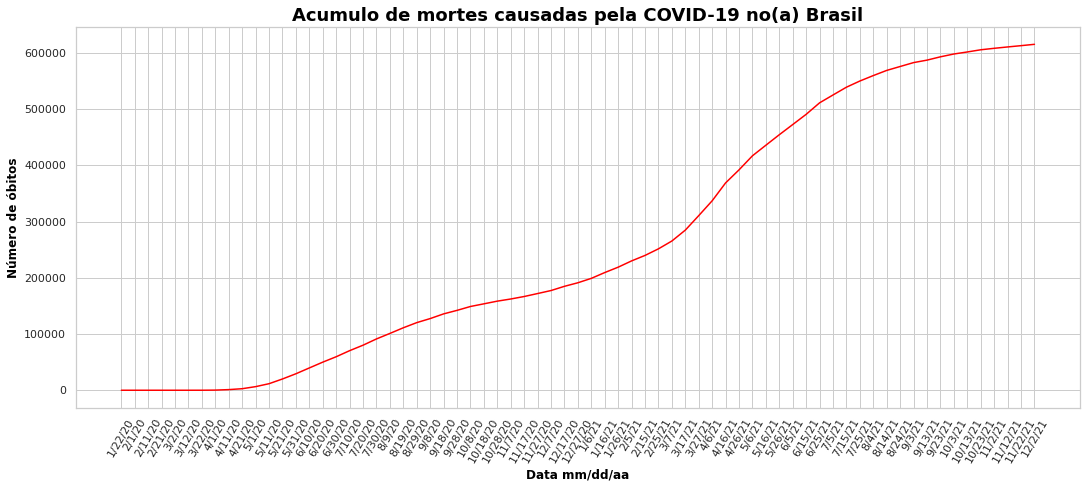

In [90]:
Grafico_de_linha(data_br, mortes_br, 'Brasil')

In [91]:
##Análise exploratória dos dados da COVID-19 no Brasil

In [92]:
##